# Rapport analytique données immobilières

## Contexte

Nous allons explorer les données de ventes immobilières en France entre 2018 et 2021. Ces données ont été enrichies avec des données en libre accès (OPENDATA) pour créer un modèle de prédiction de la valeur foncière de biens immobiliers en fonction de certaines informations clés. Tout le développement de l'application a été réalisé en Python en utilisant les packages listés dans le fichier requirements.txt.

## Présentation des jeux de données

Nous avons donc 4 jeux de données qui représentent les ventes immobilières en France entre 2018 et 2021.

In [ ]:
# On paramétrise notre display function pour avoir toutes les variables
pd.set_option('display.max_columns', None)
df.head()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2018,Vente,109000.0,13.0,NaN,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,NaN,AN,73,NaN,1,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,73.0,4.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2018,Vente,109000.0,13.0,NaN,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,NaN,AN,73,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2018,Vente,239300.0,4.0,NaN,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,NaN,163.0,4.0,S,NaN,949.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2018,Vente,239300.0,4.0,NaN,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,NaN,163.0,4.0,AG,JARD,420.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2018,Vente,239300.0,4.0,NaN,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,NaN,51.0,2.0,AG,JARD,420.0


Voici toutes les variables disponibles dans notre dataset.

In [ ]:
df.columns

Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')

Nous nous rendons rapidement compte que de nombreuses variables ne sont d'aucune utilité pour la modélisation et la prédiction. D'ailleurs une grande majorité est majoritairement constitué de valeurs manquantes.

Un grand nettoyage est donc nécesaire pour l'analyse.

## Nettoyage du jeu de données

On enlève donc les variables avec une valeur (souvent NaN) ou d'identifiant (qui n'auront donc pas d'intérêt dans la prédiction ou l'exploration):  Identifiant de document;  Reference document; 1 Articles CGI; 2 Articles CGI ; 3 Articles CGI; 4 Articles CGI; 5 Articles CGI; No disposition; No plan; Identifiant local; No Volume

B/T/Q représente l'indice de répétition qui est est une mention qui complète une numérotation de voirie. L’indice de répétition permet de
différencier plusieurs adresses portant le même numéro dans la même rue. Elle ne nous servira pas donc on l'enlève également.

Le nombre de lot est suffisant pour nous indiquer la présence ou non de lots. Le reste est redondant. On supprime les variables : 1er lot, surface carrez du 1er lot, etc.  

Nous nous occupons désormais de la variable nature culture spéciale qui nous indique la présence ou non d'un extérieur. La présence d'un terrain est clairement indiquer par la surface présente, donc si elle est de 0: il n'y a pas de terrain. En s'appuyant sur la documentation, on se rend compte que le relatif aux sections n'est pas pertinent, on supprime donc la variable. Il en va de meme pour la variable Nature mutation qui n'est pas pertinente pour notre problématique

La variable en relation avec l'adresse se sépare en plusieurs variables, nous allons donc la concaténer. Si l'adresse est nulle, c'est parce qu'il n'y a pas de n° de voie (lieux dits?), donc on remplie adresse avec "Voie". On enlève les références à l'adresse qui ne nous seront d'aucunes utilité. On enlève également le code département qui ne nous servira pas pour récupérer les départements (nous utiliserons le code postal et le nom de la commune). Pour ne garder les ventes que de lots uniques, on enlève toutes les ventes qui se répètent plus d'une fois.

Certains biens sont à l'euro symbolique ou ont un prix inférieur à 100€, nous enlevons ces biens

In [ ]:
# On visualise le pourcentage de biens avec un prix de vente inférieur à 100€.
(df2["Valeur fonciere"] < 100).value_counts()


Valeur fonciere
False    4511892
True       41787
Name: count, dtype: int64

On ne garde que les biens ayant eu un prix de vente supérieur à 100€.

## Exploration de la relation entre les variables du jeux de données et la valeur foncière.

En regardant ces graphiques, on peut constater que certaines variables possèdent un lien fort avec la valeur foncière:

- Le type de Local semble complètement influencer le prix de vente du bien. Notamment, nous pouvons repérer que les dépendances ainsi que les biens non définis (Autres) ont une valeur foncière qui semble inférieur aux appartements, locaux industriels et maison.
- Nous pouvons repérer également que le nombre de lots semblent présenter une augmentation croissant  du prix jusqu'à une vingraine de lots, passé ce prix là, on retrouve une absence visuelle de relation entre les deux variables.
- Nous pouvons déduire la même observation avec le nombre de pièces principales jusqu'à une quinzaine de pièces principales. Il semble que les "super-biens" (grandes demeures, villas) ne dépendent plus de la taille pour la prédiction.

Il est toutefois surprenant d'observer une absence de lien entre la surface du terrain et la surface réelle du batiment avec la valeur foncière (avant tout traitement d'outliers de taille de biens).

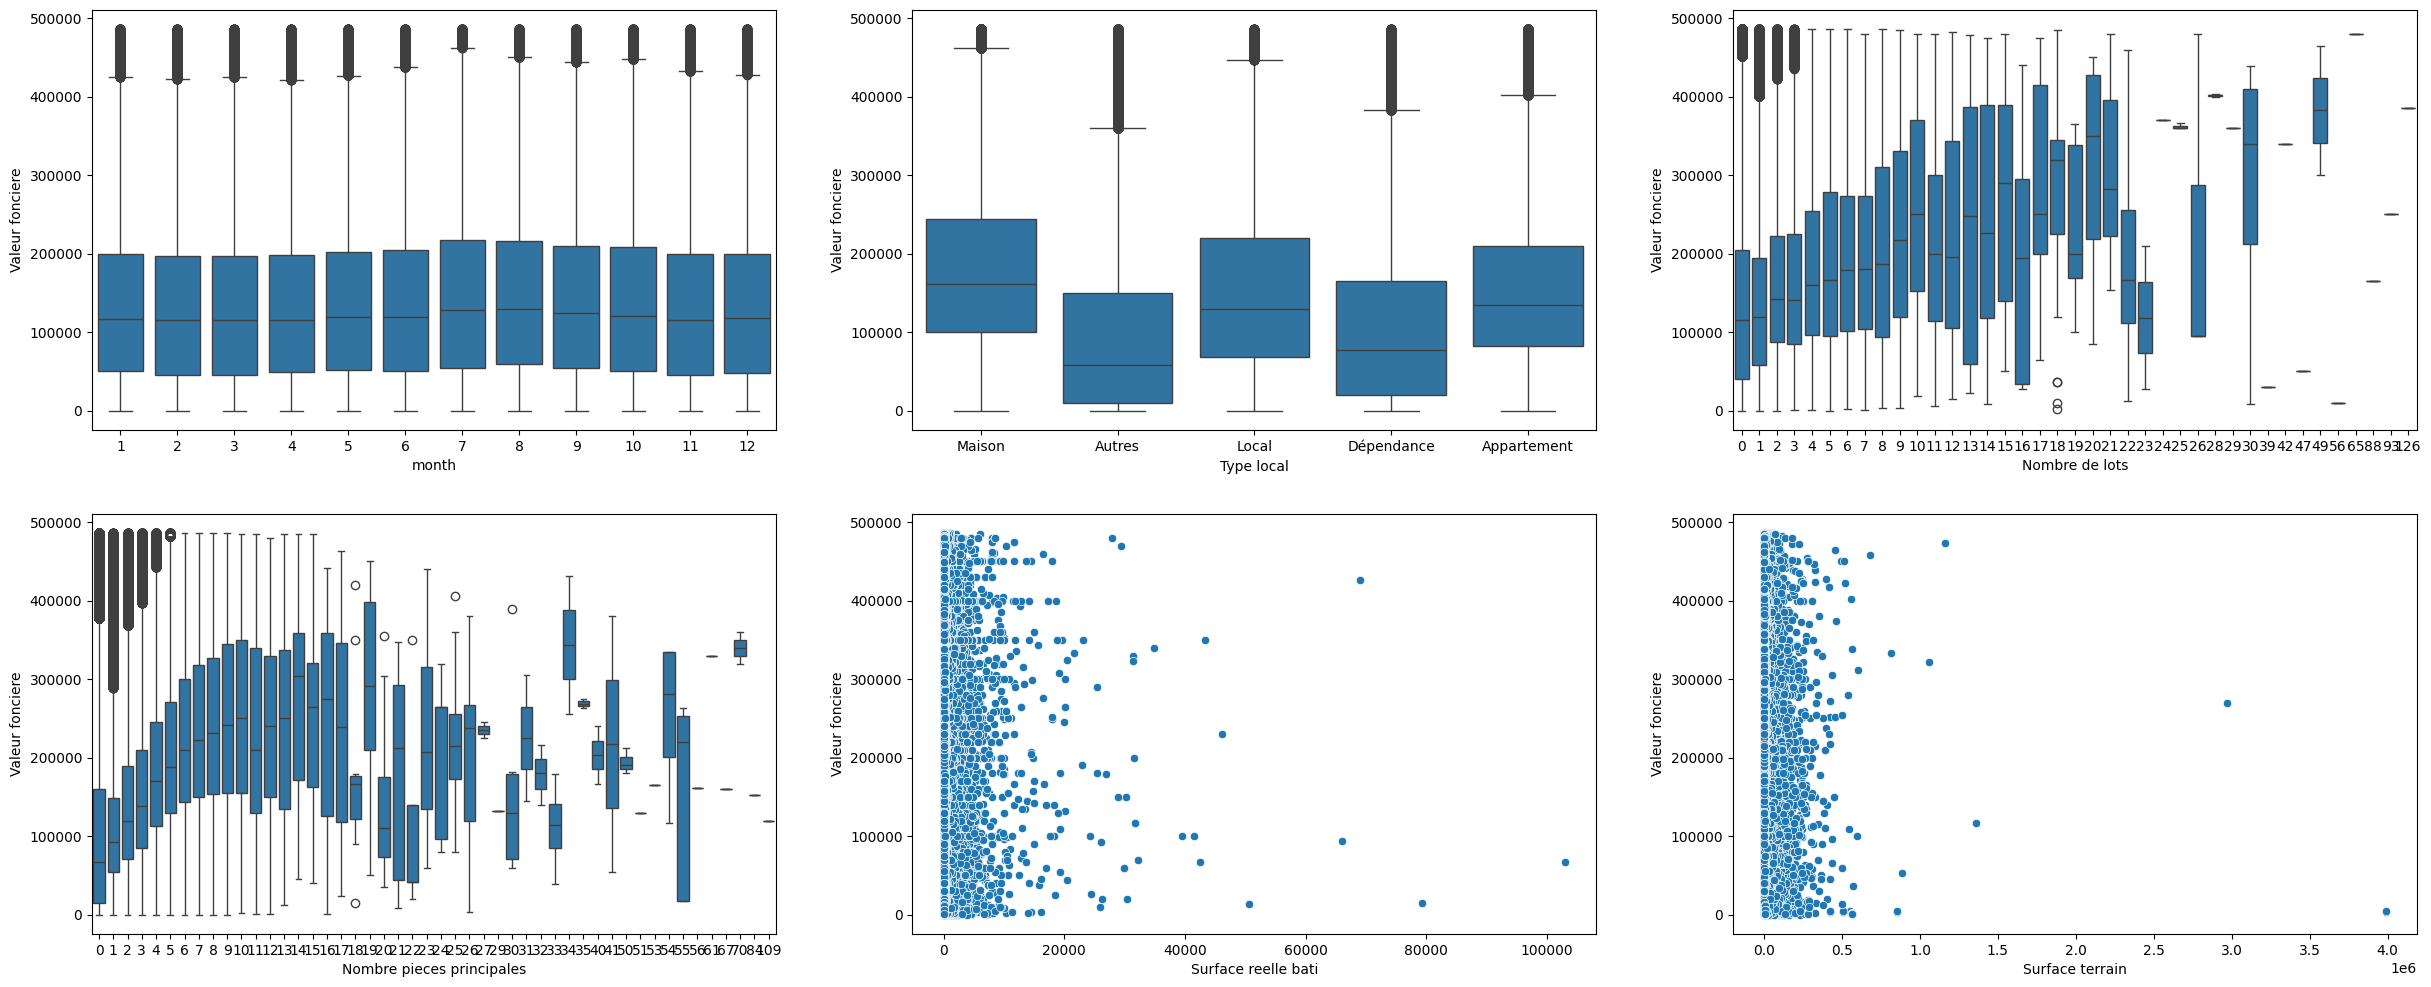



Sur ce graphique , on peut observer la variation de la valeur foncière en fonction de la région.

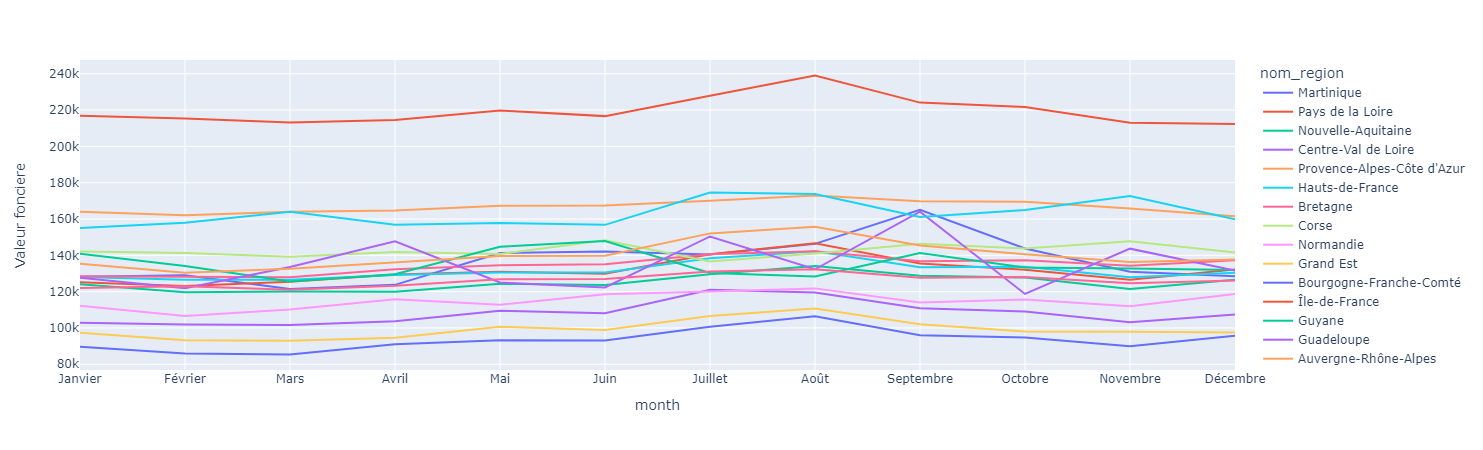

Nous pouvons observer que certaines régions semblent avoir un comportement dépendant du mois (comme l'Ile-de-France) ou encore le Centre-Val de Loire, ceux si semblent avoir un pic autour d'Août et de Septembre: cela pourrait être en lien avec les achats de biens en prévision de la rentrée.

## Cartographie

La carte correspondant au valeur foncière moyenne par département

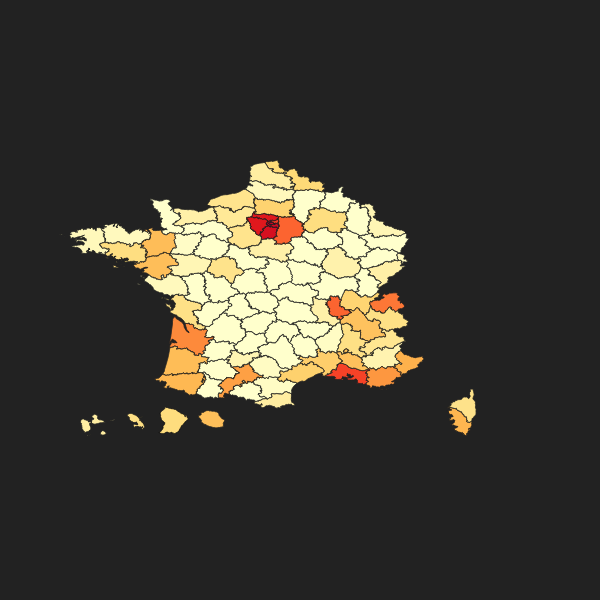

Nous pouvons très clairement obser que certains biens sont plus attractifs que les autres (notamment ceux d'Ile-de-France). Ces différences selon la géographie seront donc à prendre en compte pour la modélisation:  pour réaliser cela, nous utiliserons de l'openData dépendant de chaque département.

La carte de la France correspondant à la  valeur foncière moyenne par région

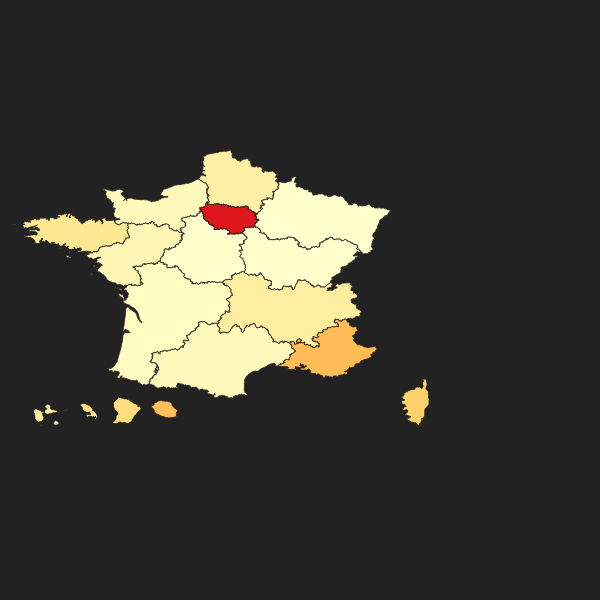

Nous retrouvons bien cette différence géographique déjà observé précédemment au niveau départemental.

## Variables supplémentaires et opendata

Nous ajoutons ensuite des variables supplémentaires (extraites depuis des jeux de données opendata) qui nous serviront à enrichir notre jeu de données pour mieux prédire la valeur foncière des biens.
- Le pourcentage de population active
- Le salaire net horaire moyen de 2021
- Le nombre d'écoles par département
- Le prix au m2 de chaque département
- Le nombre de ventes par département

Si on se concentre sur la valeur foncière, on se rend compte que la valeur foncière semble plus corrélée avec nos variables supplémentaires représentant le niveau de richesse de chaque département (slaire moyen, prix au m2 et % de population active) que les caractéristiques brutes du bien. Il semble toutefois que le nombre de pièces principales semblent influencer sur la valeur foncière des biens pris de manière global.

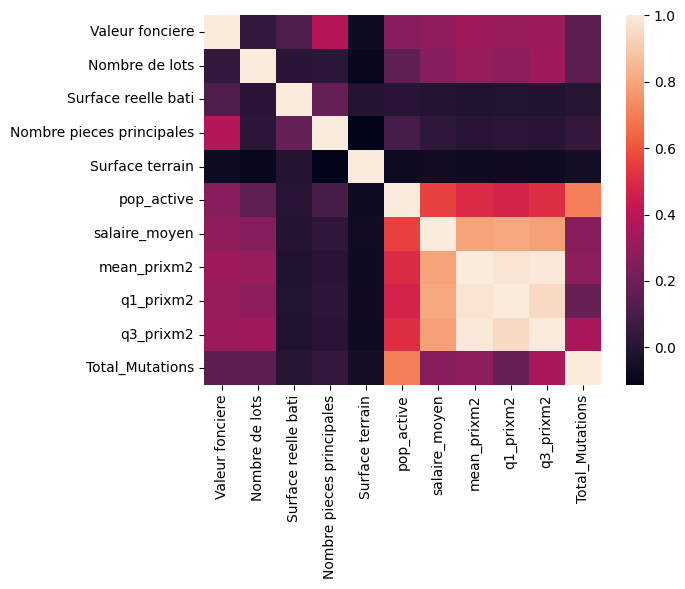

## Modélisation - Prédiction de l'étiquetage des biens

Certains biens n'ont pas été étiqueté, nous allons donc développer un arbre de décision pour pouvoir classifier chaque bien si besoin afin de réaliser la prédiction des valeurs foncières.

Notre arbre de décision réalise des performances plus qu'acceptables avec une accuracy de 97%.
En observant l'importance de chaque variables, on se rend compte que ce sont le nombre de lots, le nombre de pièces principales et la surface réelle du batiment qui sont clés pour la classification. Les autres n'ont pas d'influence.

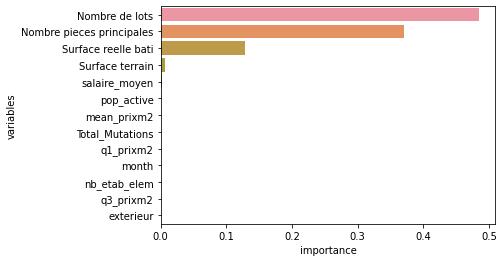

## Modelisation - Prédiction de la valeur foncière

Pour réaliser la modélisation, nous avons utilisé deux approches différentes selon les performances précédemment évaluées:
- Un arbre de décision pour la régression de la valeur foncière des locaux industriels
- Un modèle de régression linéaire avec descente de gradient stochastique pour les autres types de biens.

Nous avons appliqué un modèle différent selon le type de local. Ce choix s'est basé sur les différences de valeurs foncières que nous avons observée selon le type de local.

### Maison

Pour réaliser cela, nous avons réduis la dimensionalité du jeu de données grâce à une approche AFDM:
<img src="comp_maison.png">

La première composante semble être reliée au prix au m2 du bien et le salaire moyen horaire dans le département. Elle semble être liée à **la richesse du département**. La seconde composante semble plutôt liée avec **l'absence d'un terrain**. La troisième composante enfin semble plutôt liée avec **des caractéristiques démographiques de grandes agglomérations** (nombre d'écoles élémentaires élevé, nombre de vente de biens par département élevé et pourcentage de population active élevé). Notre quatrième composante semble **reprendre de l'information non expliquée par la deuxième composante** en se corrélant positivement avec la présence d'un terrain.

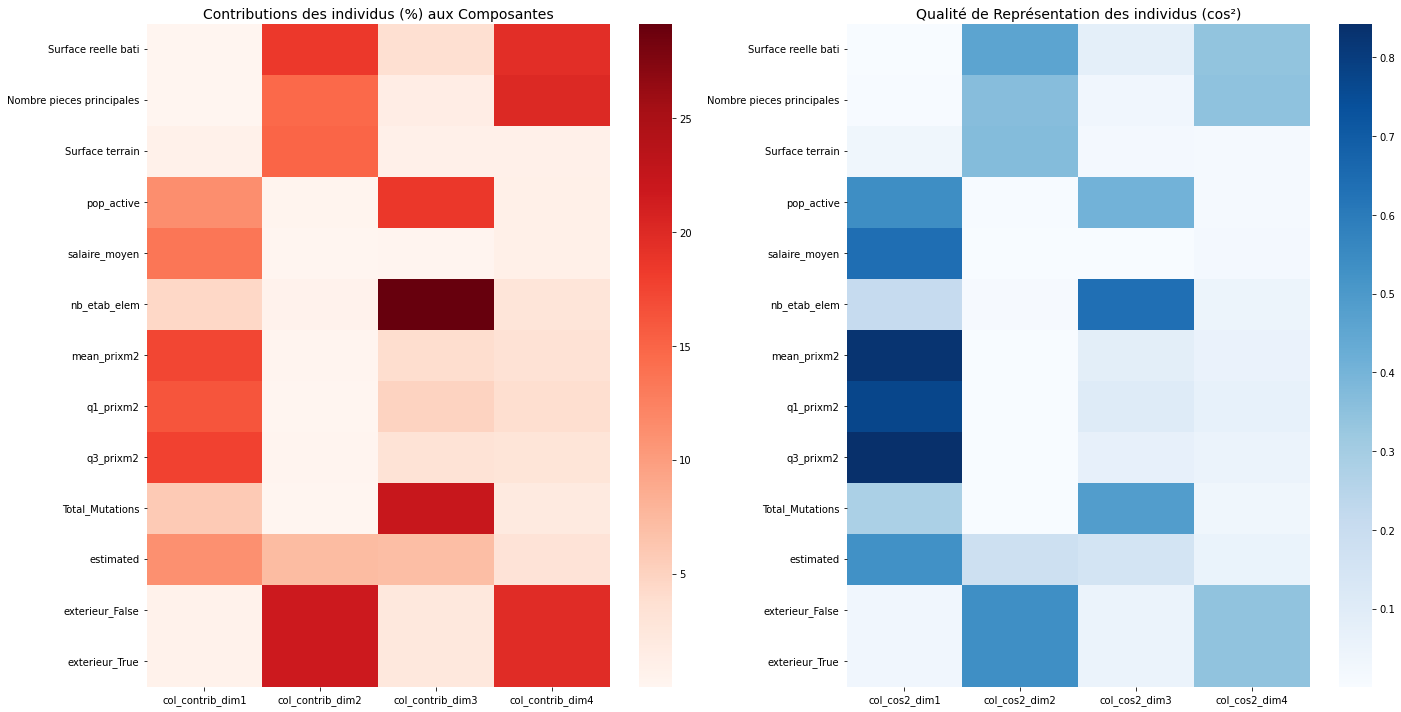

En observant les coefficients du modèle de régression linéaire, c'est la richesse de département et l'absence de terrain qui sont déterminant pour le modèle pour prédire la valeur foncière

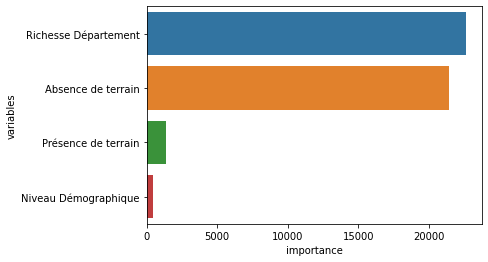

### Appartements

Pour réaliser cela, nous avons réduis la dimensionalité du jeu de données grâce à une approche AFDM:
<img src="comp_appart.png">

La première composante semble être reliée négativement au prix au m2 du bien et le salaire moyen horaire dans le département. Elle semble être liée au **niveau de pauvreté du département.** La seconde composante semble plutôt liée positivement avec la **présence d'un terrain (liée positivement avec Surface_terrain et exterieur_True)**. La troisième composante semble plutôt liée négativement avec la grandeur du bien, elle semble représenter donc **des petits appartements.** La quatrième composante est liée négativement avec les caractéristiques démographiques, elle semble représenter les **petits départements. Et enfin la cinquième composante**, elle semble liée négativement avec le nombre de ventes: elle semble représenter les départements peu attractifs.

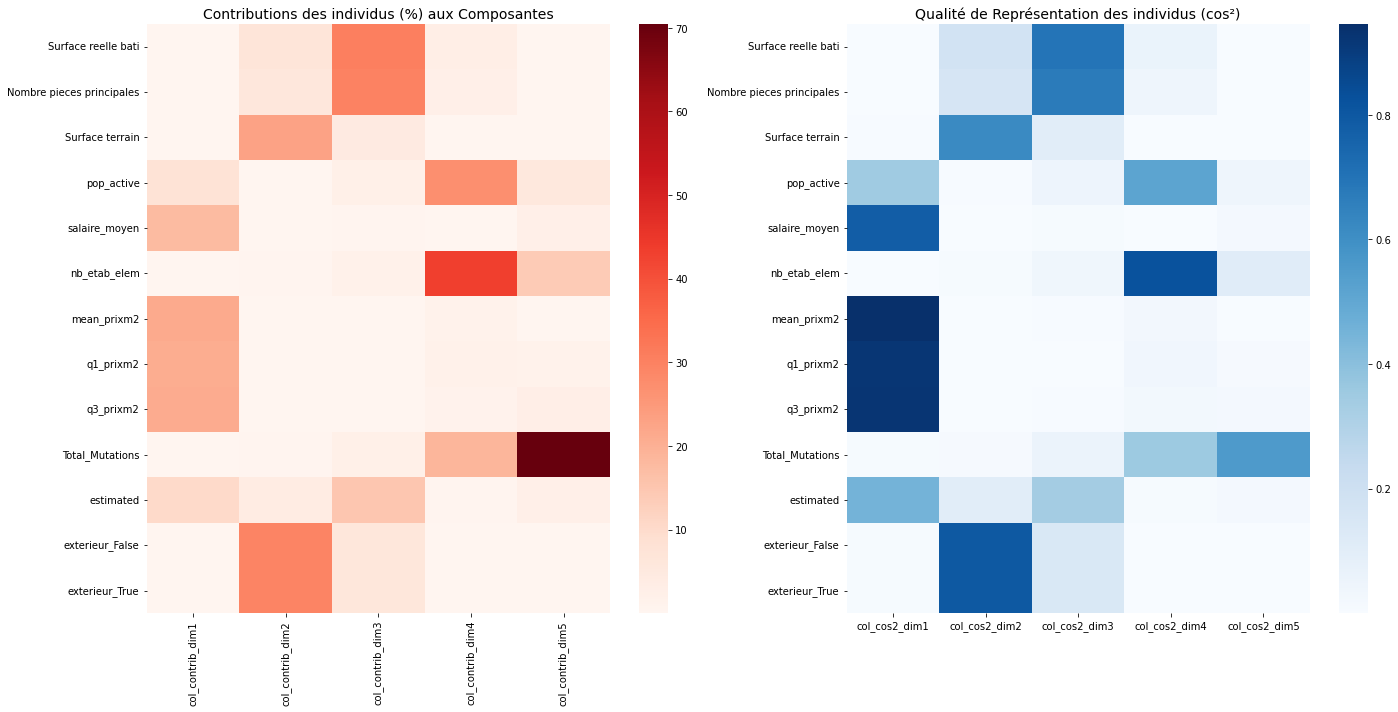

En observant les coefficients du modèle de régression linéaire, ce sont principalement le niveau de pauvreté/richesse ainsi que la présence d'un terrain ou non qui sont déterminants dans la prédiction de la valeur foncière.

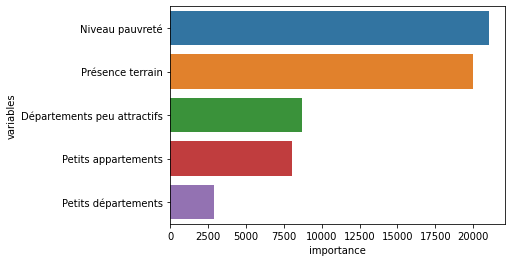

### Locaux

Pour les locaux,  comme nous avons appliqué un arbre de décision, nous n'avons pas réduit la dimensionalité pour ne pas perdre d'informations ni standardiser les données car ce genre de modèle n'est pas influencé par des différences d'unités.

Une fois l'avoir appliqué, nous avons extrait l'importance de chaque variable dans la modélisation:



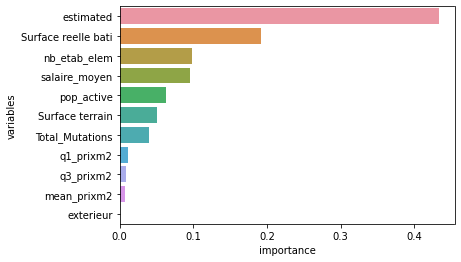

C'est principalement l'estimation du prix et la surface réelle du batiment qui sont clés. Ensuite, nous avons quelques variables démographiques.

### Dépendances

Pour réaliser cela, nous avons réduis la dimensionalité du jeu de données grâce à une approche AFDM:


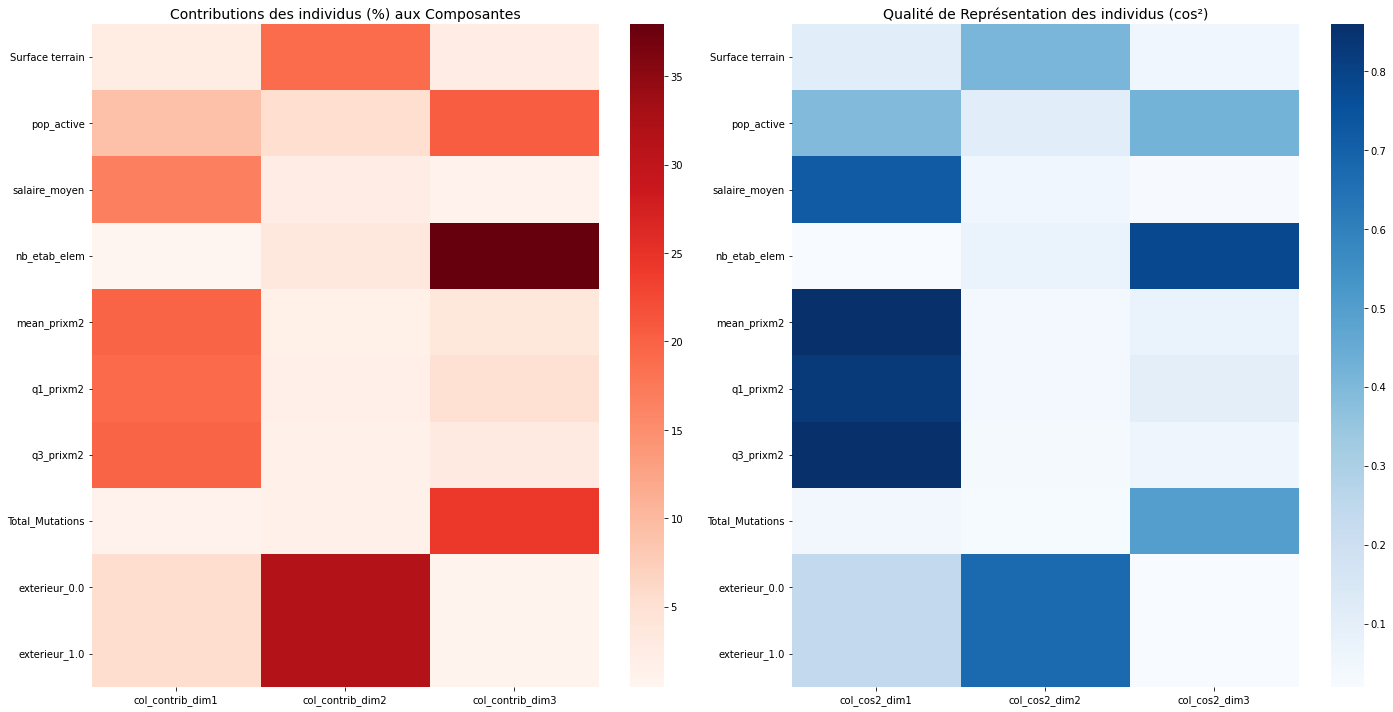

La première composante semble être reliée négativement au prix au m2 du bien et le salaire moyen horaire dans le département. Elle semble être liée au **niveau de pauvreté du département**. La seconde composante semble plutôt liée positivement à **l'absence d'un terrain (exterieur_0)**. Enfin, la troisième composante semble plutôt liée négativement avec le nombre de ventes: elle semble représenter les **départements peu attractifs**.

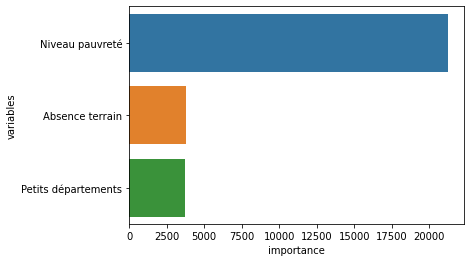

En observant les coefficients du modèle de régression linéaire, c'est principalement le niveau de richesse/pauvreté du département qui sont pértinents pour la prédiction.